In [31]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import psycopg2 as pg
%matplotlib inline
import seaborn as sns
from sqlalchemy import create_engine
from datetime import datetime#, timedelta
from utils import db_utils
from utils import iefp_data_utils

In [32]:
#Connect to database
conn = db_utils.connect_to_db()

In [33]:
#Read movements data from database as a dataframe
movements = db_utils.read_table(conn,'cascais_v2','movement')

In [34]:
#Read Application Data
applications = pd.read_sql_table(table_name='application',con=conn,schema='cascais_v2')

In [35]:
applications.head()

,anomes,ctipo_movimento,dtipo_movimento,ute_id,sexo,chabilitacao_escolar,dhabilitacao_escolar,cdeficiencia,ddeficiencia,cnacionalidade,...,conjuge_estado_civil,conjuge_categoria,conjuge_estado,conjuge_motivo_indisponibilidade,candidatura_categoria_anterior,candidatura_estado_anterior,ute_nr_pessoas_cargo,ute_nr_descendentes_cargo,candidatura_data_ppe,table_index
0,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,1058797,M,09,9 ANOS,0,NÃO DEFICIENTE,PT,...,None,None,None,None,None,None,0,None,None,1
1,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,1062047,F,06,6 ANOS,0,NÃO DEFICIENTE,PT,...,None,None,None,None,None,None,1,None,None,2
2,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,1080395,F,06,6 ANOS,21,DEFICIÃNCIAS DA MEMÃRIA,PT,...,None,None,None,None,None,None,1,None,None,3
3,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,1194683,F,LC,LICENCIATURA,0,NÃO DEFICIENTE,PT,...,None,None,None,None,None,None,0,None,None,4
4,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,1199775,M,09,9 ANOS,0,NÃO DEFICIENTE,PT,...,None,None,None,None,None,None,0,None,None,5


In [36]:
clean_apps = iefp_data_utils.clean_applications(applications,'1980-01-01','2015-04-30')

In [37]:
clean_movs = iefp_data_utils.clean_movements(movements, '1980-01-01','2017-06-01',clean_apps['table_index'])
clean_movs.describe(include='all')

,ute_id,movement_event_date,application_id,movement_type,movement_subtype,movement_result,movement_index
count,9.342320e+05,934232,934232.000000,934232,934232,934232,934232.000000
unique,NaN,3893,NaN,6,21031,106,NaN
top,NaN,2013-09-30,NaN,intervention,DESEMPREGADO-NOVO EMPREGO,CONCLUIU,NaN
freq,NaN,2488,NaN,334472,126650,226564,NaN
mean,3.444234e+06,NaN,51954.553660,NaN,NaN,NaN,127188.334216
std,1.495393e+06,NaN,28056.812625,NaN,NaN,NaN,100143.954914
min,8.180000e+02,NaN,1.000000,NaN,NaN,NaN,1.000000
25%,1.916013e+06,NaN,28245.000000,NaN,NaN,NaN,51939.750000
50%,3.754592e+06,NaN,53818.000000,NaN,NaN,NaN,94133.500000
75%,4.590880e+06,NaN,75412.000000,NaN,NaN,NaN,183704.000000


In [38]:
clean_movs.head()

,ute_id,movement_event_date,application_id,movement_type,movement_subtype,movement_result,movement_index
16,818,2013-02-18,70870,application,DESEMPREGADO-NOVO EMPREGO,,70870
17,818,2013-02-18,70870,intervention,INICIO PPE,INICIADO,228179
18,818,2013-02-18,70870,intervention,ENTREVISTA COLOCAÃÃO,CONCLUIU,228180
19,818,2013-04-04,70870,convocation,OFERTA,APRESENTADO,124146
20,818,2013-04-08,70870,interview,588061835,RECUSA DA ENTIDADE EMPREGADORA - NÃO MARCAÃÃ...,104497


In [39]:
#Merging application and movements data
clean_data = pd.merge(clean_movs,clean_apps,how='inner', left_on = 'application_id', right_on='table_index')

In [40]:
clean_data.shape

(934232, 69)

In [43]:
clean_data.head()

,ute_id_x,movement_event_date,application_id,movement_type,movement_subtype,movement_result,movement_index,anomes,ctipo_movimento,dtipo_movimento,...,conjuge_categoria,conjuge_estado,conjuge_motivo_indisponibilidade,candidatura_categoria_anterior,candidatura_estado_anterior,ute_nr_pessoas_cargo,ute_nr_descendentes_cargo,candidatura_data_ppe,table_index,app_start_date
0,818,2013-02-18,70870,application,DESEMPREGADO-NOVO EMPREGO,,70870,201302,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,...,None,None,None,None,None,2,2,None,70870,2013-02-18
1,818,2013-02-18,70870,intervention,INICIO PPE,INICIADO,228179,201302,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,...,None,None,None,None,None,2,2,None,70870,2013-02-18
2,818,2013-02-18,70870,intervention,ENTREVISTA COLOCAÃÃO,CONCLUIU,228180,201302,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,...,None,None,None,None,None,2,2,None,70870,2013-02-18
3,818,2013-04-04,70870,convocation,OFERTA,APRESENTADO,124146,201302,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,...,None,None,None,None,None,2,2,None,70870,2013-02-18
4,818,2013-04-08,70870,interview,588061835,RECUSA DA ENTIDADE EMPREGADORA - NÃO MARCAÃÃ...,104497,201302,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,...,None,None,None,None,None,2,2,None,70870,2013-02-18


In [44]:
#1. Histogram of length of application
applications_length = clean_data.groupby('application_id').movement_event_date.agg(lambda x: ((x.iloc[-1] - x.iloc[0]))).to_frame(name='duration').reset_index(level=0)
applications_length['duration'] = (applications_length['duration']/np.timedelta64(1, 'M'))
applications_length.head()

TypeError: unsupported operand type(s) for -: 'unicode' and 'unicode'

In [23]:
applications_length['duration'].describe()

count    96388.000000
mean        12.454679
std         14.664048
min          0.000000
25%          2.924085
50%          6.439557
75%         17.027044
max        203.667426
Name: duration, dtype: float64

In [24]:
applications_length[applications_length.duration > 120]

,application_id,duration
18696,19720,148.734060
31070,32713,122.318733
40766,42853,203.667426
46984,49377,162.697386
74732,78114,129.152549
91735,95662,155.666441
96320,111457,123.895768
96368,118317,129.678227


In [25]:
clean_data[clean_data['application_id'] == 42853]

,ute_id_x,movement_event_date,application_id,movement_type,movement_subtype,movement_result,movement_index,anomes,ctipo_movimento,dtipo_movimento,...,conjuge_categoria,conjuge_estado,conjuge_motivo_indisponibilidade,candidatura_categoria_anterior,candidatura_estado_anterior,ute_nr_pessoas_cargo,ute_nr_descendentes_cargo,candidatura_data_ppe,table_index,app_start_date
154327,1608275,1994-12-09,42853,application,DESEMPREGADO-NOVO EMPREGO,,42853,201011,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,...,None,None,None,None,None,1,None,None,42853,1994-12-09
154328,1608275,2011-11-29,42853,cancellation,FALTA AO CONTROLO,,49019,201011,11,PEDIDOS DE EMPREGO AO LONGO DO MÃS,...,None,None,None,None,None,1,None,None,42853,1994-12-09


/opt/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


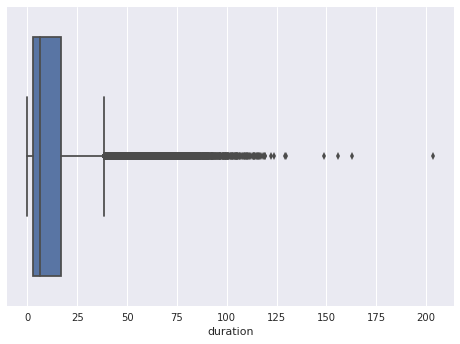

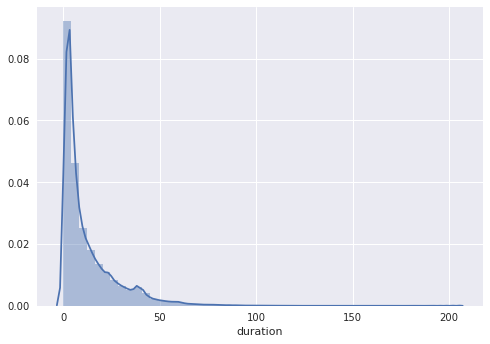

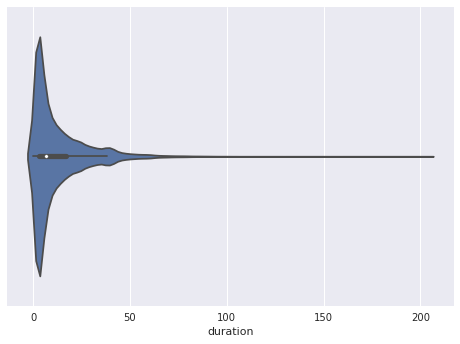

In [26]:
sns.boxplot(x='duration', data=applications_length)
plt.figure()
sns.distplot(applications_length['duration']);
plt.figure()
sns.violinplot(applications_length['duration'])

In [27]:
#1.1 - Proportion of Applications which last for more than...
print round(100*float(applications_length[applications_length['duration'] >= 12].shape[0])/applications_length.shape[0],2), "% os apps. which take 1 year or more"
print round(100*float(applications_length[applications_length['duration'] >= 24].shape[0])/applications_length.shape[0],2), "% os apps. which take 2 years or more"
print round(100*float(applications_length[applications_length['duration'] >= 36].shape[0])/applications_length.shape[0],2), "% os apps. which take 3 years or more"
print round(100*float(applications_length[applications_length['duration'] >= 60].shape[0])/applications_length.shape[0],2), "% os apps. which take 5 years or more" 

33.89 % os apps. which take 1 year or more
16.72 % os apps. which take 2 years or more
8.54 % os apps. which take 3 years or more
1.52 % os apps. which take 5 years or more


In [28]:
#1.1 - How many applications have system exit movements within them?
f = {'movement_event_date': lambda x: ((x.iloc[-1] - x.iloc[0])/np.timedelta64(1, 'D')).astype(int)/30, 
     'movement_type': lambda x: pd.Series.any(x[:-1].isin(['cancellation'])), 
     'movement_type': lambda x: pd.Series.any(x[:-1].isin(['ADMITIDO / COLOCADO']))}
applications_analysis = movements.groupby('application_id').agg(f).reset_index()

In [84]:
s = pd.Series([1,3,5,np.nan,6,8])
s[:-1]

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
dtype: float64

In [24]:
#2. Education attainment by age (scatterplot)
sns.lmplot('dhabilitacao_escolar','ute_idade', data=clean_data)

ValueError: invalid literal for float(): 11 ANOS

ValueError: invalid literal for float(): 11 ANOS

In [27]:
#4. Check how often there are discrepencies between year-month and date
apps_date_sanity_check = clean_data[(clean_data['movement_type'] == 'application') & ((pd.DatetimeIndex(clean_data['movement_date']).year != pd.DatetimeIndex(clean_data['date']).year) | (pd.DatetimeIndex(clean_data['movement_date']).month != pd.DatetimeIndex(clean_data['date']).month))]
print(apps_date_sanity_check.shape[0]/float(clean_apps.shape[0]))
print(apps_date_sanity_check.head())
cancel_date_sanity_check = clean_data[(clean_data['movement_type'] == 'cancellation') & ((pd.DatetimeIndex(clean_data['movement_date']).year != pd.DatetimeIndex(clean_data['date']).year) | (pd.DatetimeIndex(clean_data['movement_date']).month != pd.DatetimeIndex(clean_data['date']).month))]
print(cancel_date_sanity_check.shape[0]/float(clean_data[clean_data['movement_type'] == 'cancellation'].shape[0]))
print(cancel_date_sanity_check.head())

0.0250158624492
      ute_id_x        movement_date  year_month  application_id movement_type  \
536      14132  2007-03-23 00:00:00      200704            2606   application   
573      14829  2007-05-14 00:00:00      200709            6361   application   
796      35566  2012-12-04 00:00:00      201306           75390   application   
1146     65411  2012-07-02 00:00:00      201209           66325   application   
1288     79158  2011-05-25 00:00:00      201206           62945   application   

               movement_subtype movement_result  movement_index       date  \
536   DESEMPREGADO-NOVO EMPREGO                            2606 2007-04-01   
573   DESEMPREGADO-NOVO EMPREGO                            6361 2007-09-01   
796   DESEMPREGADO-NOVO EMPREGO                           75390 2013-06-01   
1146  DESEMPREGADO-NOVO EMPREGO                           66325 2012-09-01   
1288  DESEMPREGADO-NOVO EMPREGO                           62945 2012-06-01   

      table_index      ...  

In [30]:
#11. Understand data cleaning needed for applications on the same date (either because they disputed cancellation reason or because they were placed and still want a job)
apps_in_same_date = clean_data[clean_data['movement_type'] == 'application'].groupby(['ute_id_x','movement_event_date']).movement_type.agg(lambda x: x.shape[0]).reset_index(name='num_reps')
apps_in_same_date[apps_in_same_date['num_reps'] > 1]

,ute_id_x,movement_event_date,num_reps
405,135175,2009-11-19,2
510,146129,2010-03-31,2
652,239793,2013-10-21,2
887,264820,2009-07-29,2
970,266601,2014-01-06,2
1129,269846,2011-09-02,3
1442,285924,2007-07-05,2
1719,297381,2010-01-25,2
1901,300241,2010-10-26,2
1966,301527,2014-10-30,2


In [43]:
#Looking at it in a different way (Same Results)
apps_in_same_date2 = clean_data[clean_data['movement_type'] == 'application'].duplicated(subset=['ute_id','movement_event_date'])
sum(apps_in_same_date2)

1

In [44]:
#Look at the duplicated application
clean_data[clean_data['ute_id'] == 1491847]

,ute_id,movement_event_date,application_id,movement_type,movement_subtype,movement_result,movement_index,table_index,anomes,ctipo_movimento,...,conjuge_estado_civil,conjuge_categoria,conjuge_estado,conjuge_motivo_indisponibilidade,candidatura_categoria_anterior,candidatura_estado_anterior,ute_nr_pessoas_cargo,ute_nr_descendentes_cargo,candidatura_data_ppe,app_start_date
530,1491847,2013-12-16,81670,application,DESEMPREGADO-NOVO EMPREGO,,81670,81670,201312,11,...,None,None,None,None,2.0,PAS,0.0,0.0,2009-04-13 00:00:00,2013-12-16
531,1491847,2013-12-16,81671,application,DESEMPREGADO-NOVO EMPREGO,,81671,81671,201312,11,...,None,None,None,None,2.0,PAS,0.0,0.0,2013-12-16 00:00:00,2013-12-16
532,1491847,2013-12-16,81671,cancellation,OUTROS MOTIVOS,,70910,81671,201312,11,...,None,None,None,None,2.0,PAS,0.0,0.0,2013-12-16 00:00:00,2013-12-16
533,1491847,2013-12-16,81671,intervention,ENTREVISTA COLOCAÃÃO,CONCLUIU,279959,81671,201312,11,...,None,None,None,None,2.0,PAS,0.0,0.0,2013-12-16 00:00:00,2013-12-16
534,1491847,2013-12-16,81671,intervention,INICIO PPE,INICIADO,279960,81671,201312,11,...,None,None,None,None,2.0,PAS,0.0,0.0,2013-12-16 00:00:00,2013-12-16
535,1491847,2014-03-27,81671,category_change,DESEMPREGADO-NOVO EMPREGO,DESEMP NOVO EMPREGO - INDISPONÃVEL,69918,81671,201312,11,...,None,None,None,None,2.0,PAS,0.0,0.0,2013-12-16 00:00:00,2013-12-16
536,1491847,2014-04-02,81671,category_change,DESEMP NOVO EMPREGO - INDISPONÃVEL,DESEMPREGADO-NOVO EMPREGO,70311,81671,201312,11,...,None,None,None,None,2.0,PAS,0.0,0.0,2013-12-16 00:00:00,2013-12-16
537,1491847,2014-04-10,81671,convocation,CONVOCATÃRIA GIP,COMPARECEU,159227,81671,201312,11,...,None,None,None,None,2.0,PAS,0.0,0.0,2013-12-16 00:00:00,2013-12-16
538,1491847,2014-04-21,81671,intervention,ENTREVISTA ORIENTAÃÃO,CONCLUIU,306617,81671,201312,11,...,None,None,None,None,2.0,PAS,0.0,0.0,2013-12-16 00:00:00,2013-12-16
539,1491847,2014-07-01,81671,convocation,GERAL UTENTE,COMPARECEU,170248,81671,201312,11,...,None,None,None,None,2.0,PAS,0.0,0.0,2013-12-16 00:00:00,2013-12-16


In [47]:
#Look in the raw applications table
apps_in_same_date_raw = applications.groupby(['ute_id','candidatura_data']).ctipo_movimento.agg(lambda x: x.shape[0]).reset_index(name='num_reps')
apps_in_same_date_raw[apps_in_same_date_raw['num_reps'] > 1]

,ute_id,candidatura_data,num_reps
504,135175,2009-11-19 00:00:00,2
538,136326,2016-08-30 00:00:00,2
539,136356,2008-06-04 00:00:00,2
576,141380,2009-08-26 00:00:00,2
642,146129,2010-03-31 00:00:00,3
721,174220,2007-09-24 00:00:00,2
761,206190,2015-11-10 00:00:00,2
789,211632,2011-10-18 00:00:00,2
798,215907,2016-09-01 00:00:00,2
826,239793,2013-10-21 00:00:00,2


In [48]:
#Look in the raw applications table
apps_in_same_date = clean_apps.groupby(['ute_id','candidatura_data']).ctipo_movimento.agg(lambda x: x.shape[0]).reset_index(name='num_reps')
apps_in_same_date[apps_in_same_date['num_reps'] > 1]

,ute_id,candidatura_data,num_reps
405,135175,2009-11-19 00:00:00,2
510,146129,2010-03-31 00:00:00,2
652,239793,2013-10-21 00:00:00,2
887,264820,2009-07-29 00:00:00,2
970,266601,2014-01-06 00:00:00,2
1129,269846,2011-09-02 00:00:00,3
1442,285924,2007-07-05 00:00:00,2
1719,297381,2010-01-25 00:00:00,2
1901,300241,2010-10-26 00:00:00,2
1966,301527,2014-10-30 10:02:35,2


In [53]:
clean_apps[clean_apps['ute_id'] == 135175][['ute_id','anomes','candidatura_data']]

,ute_id,anomes,candidatura_data
7,135175,200701,2007-01-24 00:00:00
10719,135175,200802,2008-02-12 00:00:00
30930,135175,200911,2009-11-19 00:00:00
85182,135175,201403,2009-11-19 00:00:00


In [37]:
apps_in_same_date2 = clean_data.duplicated(subset=['ute_id','movement_event_date'])
sum(apps_in_same_date2)

1103

In [26]:
clean_data['movement_event_date']

0      2013-12-18
1      2013-12-23
2      2013-12-23
3      2013-12-23
4      2013-12-23
5      2014-01-07
6      2014-01-24
7      2014-03-06
8      2014-05-15
9      2014-05-19
10     2014-05-23
11     2014-05-26
12     2014-06-02
13     2014-07-07
14     2013-11-07
15     2013-11-07
16     2013-11-07
17     2013-11-20
18     2013-12-06
19     2014-03-03
20     2014-03-11
21     2014-03-17
22     2014-06-06
23     2014-09-08
24     2014-10-17
25     2014-10-28
26     2015-03-03
27     2015-03-11
28     2015-03-23
29     2015-04-07
          ...    
4059   2014-10-07
4060   2014-10-30
4061   2014-10-30
4062   2014-10-30
4063   2014-11-14
4064   2014-11-27
4065   2014-11-27
4066   2016-01-25
4067   2016-04-28
4068   2013-11-29
4069   2013-11-29
4070   2013-11-29
4071   2014-02-24
4072   2014-02-24
4073   2013-11-29
4074   2013-11-29
4075   2013-11-29
4076   2013-11-29
4077   2014-03-18
4078   2014-04-10
4079   2014-04-10
4080   2014-11-18
4081   2014-12-11
4082   2014-12-30
4083   201